In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
for row in lat_lngs:
    print(row)

(-10.872417586029911, 167.97542014282396)
(82.19567550202538, -175.34513476338353)
(26.42297455483201, -20.45452284920259)
(19.676303641949787, -83.62714725388426)
(-5.842618498577451, -115.60942262498783)
(-21.26739595148284, 106.23607666709353)
(11.278501796719894, 104.86620584181225)
(-10.228458163850036, -92.15443546302248)
(82.37075887366046, -145.09458996930238)
(-55.823557939502, -94.1907523685628)
(68.13612877838932, 2.009249024332007)
(-26.724077432025446, -6.074294425737179)
(-86.66612236451083, -70.76667327080403)
(45.90933375435938, 140.219179206563)
(44.907592019251126, 78.23043052001651)
(35.95927926889104, 165.94271985721417)
(-28.648288287972626, 35.39131505607418)
(-12.730095379491402, 165.2873468565599)
(-44.613285276359896, -40.82423855164919)
(17.807379670029945, -52.119351835136456)
(3.7287531446973645, 160.33628183008318)
(2.711364382637953, -1.617590881623272)
(40.51388485592679, 95.82034072821091)
(4.998778883706876, 113.4614361164409)
(-10.232505348172097, -79.

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(zip(lats,lngs))
for row in coordinates:
    print(row)

(-10.872417586029911, 167.97542014282396)
(82.19567550202538, -175.34513476338353)
(26.42297455483201, -20.45452284920259)
(19.676303641949787, -83.62714725388426)
(-5.842618498577451, -115.60942262498783)
(-21.26739595148284, 106.23607666709353)
(11.278501796719894, 104.86620584181225)
(-10.228458163850036, -92.15443546302248)
(82.37075887366046, -145.09458996930238)
(-55.823557939502, -94.1907523685628)
(68.13612877838932, 2.009249024332007)
(-26.724077432025446, -6.074294425737179)
(-86.66612236451083, -70.76667327080403)
(45.90933375435938, 140.219179206563)
(44.907592019251126, 78.23043052001651)
(35.95927926889104, 165.94271985721417)
(-28.648288287972626, 35.39131505607418)
(-12.730095379491402, 165.2873468565599)
(-44.613285276359896, -40.82423855164919)
(17.807379670029945, -52.119351835136456)
(3.7287531446973645, 160.33628183008318)
(2.711364382637953, -1.617590881623272)
(40.51388485592679, 95.82034072821091)
(4.998778883706876, 113.4614361164409)
(-10.232505348172097, -79.

(-86.83302917937837, -120.96465878444798)
(-51.73328163927245, 175.85370302567378)
(1.2981643436581862, 80.88106333264608)
(-3.3118566369706883, -122.09064494401791)
(-16.94422971786105, -2.26105869403753)
(-18.299875048070405, 158.74634617984782)
(-56.48955314052487, 169.28308631618472)
(20.333344566261232, 82.17631772428774)
(-88.26078702559053, 136.46425394476853)
(-2.0253249260248225, -31.64947642300936)
(-80.09190576207018, 39.29774416744863)
(-72.14956492664365, 19.25960686871983)
(52.372223819288564, 53.02731939041777)
(89.34294056178206, -4.492942726577496)
(-38.0013481505804, -137.16389652493928)
(65.78699060398759, 156.93177243827546)
(-74.98860176112906, 105.43912202578207)
(-6.998605479714229, -0.1785337099613855)
(-80.33259209213927, -58.851338825983845)
(65.9172063575858, 134.40659745417668)
(-64.57405164785723, 45.97977842590447)
(78.21634815238295, 116.27708219535629)
(56.140237430707884, 62.895840108439785)
(-56.660192043721615, -88.22932358266888)


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []


# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=117c18183df9a94fc3b50fc860f6046d


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lata
Processing Record 2 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 1 | los llanos de aridane
Processing Record 4 of Set 1 | west bay
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | ta khmau
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | raudeberg
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | wakkanai
Processing Record 15 of Set 1 | kirovskiy
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | richards bay
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | bathsheba
Processing Record 20 of Set 1 | namatanai
Processing Record 21 of Set 1 | takoradi
Processing Record 22 of Set 1 | y

Processing Record 34 of Set 4 | bonfim
Processing Record 35 of Set 4 | ostrovnoy
Processing Record 36 of Set 4 | grindavik
Processing Record 37 of Set 4 | edson
Processing Record 38 of Set 4 | saint-francois
Processing Record 39 of Set 4 | gien
Processing Record 40 of Set 4 | tuatapere
Processing Record 41 of Set 4 | mersing
Processing Record 42 of Set 4 | yulara
Processing Record 43 of Set 4 | karlshamn
Processing Record 44 of Set 4 | lorengau
Processing Record 45 of Set 4 | gaoual
Processing Record 46 of Set 4 | broken hill
Processing Record 47 of Set 4 | lebu
Processing Record 48 of Set 4 | hami
Processing Record 49 of Set 4 | yar-sale
Processing Record 50 of Set 4 | faya
Processing Record 1 of Set 5 | bilibino
Processing Record 2 of Set 5 | yuza
Processing Record 3 of Set 5 | buckeye
Processing Record 4 of Set 5 | tabas
Processing Record 5 of Set 5 | arteaga
Processing Record 6 of Set 5 | gangtok
Processing Record 7 of Set 5 | russell
Processing Record 8 of Set 5 | san quintin
Proc

Processing Record 28 of Set 8 | yibin
Processing Record 29 of Set 8 | beringovskiy
Processing Record 30 of Set 8 | durant
Processing Record 31 of Set 8 | obo
Processing Record 32 of Set 8 | mindelo
Processing Record 33 of Set 8 | erzurum
Processing Record 34 of Set 8 | pirot
Processing Record 35 of Set 8 | nusaybin
Processing Record 36 of Set 8 | raga
Processing Record 37 of Set 8 | leningradskiy
Processing Record 38 of Set 8 | togur
Processing Record 39 of Set 8 | avera
Processing Record 40 of Set 8 | batagay
Processing Record 41 of Set 8 | cabra
Processing Record 42 of Set 8 | qaqortoq
Processing Record 43 of Set 8 | san vicente
Processing Record 44 of Set 8 | xinzhi
Processing Record 45 of Set 8 | veraval
Processing Record 46 of Set 8 | cabinda
Processing Record 47 of Set 8 | alofi
Processing Record 48 of Set 8 | cockburn town
Processing Record 49 of Set 8 | zhigansk
Processing Record 50 of Set 8 | roald
Processing Record 1 of Set 9 | dhidhdhoo
Processing Record 2 of Set 9 | scottsb

Processing Record 18 of Set 12 | acuna
City not found. Skipping...
Processing Record 19 of Set 12 | namibe
Processing Record 20 of Set 12 | satitoa
City not found. Skipping...
Processing Record 21 of Set 12 | port moresby
Processing Record 22 of Set 12 | kudat
Processing Record 23 of Set 12 | finschhafen
Processing Record 24 of Set 12 | cruzeiro do oeste
Processing Record 25 of Set 12 | nalut
Processing Record 26 of Set 12 | chabahar
Processing Record 27 of Set 12 | cochrane
Processing Record 28 of Set 12 | gobabis
Processing Record 29 of Set 12 | palenque
Processing Record 30 of Set 12 | belgrade
Processing Record 31 of Set 12 | poso
Processing Record 32 of Set 12 | taybad
Processing Record 33 of Set 12 | sabzevar
Processing Record 34 of Set 12 | creel
Processing Record 35 of Set 12 | teguise
Processing Record 36 of Set 12 | lumeje
Processing Record 37 of Set 12 | tondano
Processing Record 38 of Set 12 | alice springs
Processing Record 39 of Set 12 | barawe
City not found. Skipping...

In [11]:
len(city_data)

571

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lata,40.1629,-8.3327,61.05,98,37,2.01,PT,2021-07-24 00:00:35
1,Los Llanos De Aridane,28.6585,-17.9182,67.75,91,0,18.41,ES,2021-07-24 00:00:36
2,West Bay,19.3667,-81.4167,84.99,81,92,1.01,KY,2021-07-24 00:00:37
3,Atuona,-9.8000,-139.0333,77.45,76,36,11.07,PF,2021-07-23 23:57:51
4,Carnarvon,-24.8667,113.6333,60.51,66,82,17.65,AU,2021-07-24 00:00:37
5,Ta Khmau,11.4833,104.9500,82.45,74,40,6.91,KH,2021-07-24 00:00:38
6,Puerto Ayora,-0.7393,-90.3518,72.55,84,91,5.01,EC,2021-07-24 00:00:39
7,Barrow,71.2906,-156.7887,39.22,87,90,19.57,US,2021-07-24 00:00:39
8,Punta Arenas,-53.1500,-70.9167,37.51,87,71,21.85,CL,2021-07-23 23:56:28
9,Raudeberg,61.9875,5.1352,57.87,90,59,5.12,NO,2021-07-24 00:00:40


In [13]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date","Lat", "Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]

# Assign a new or the same DataFrame the new column order.
city_data_df= city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lata,PT,2021-07-24 00:00:35,40.1629,-8.3327,61.05,98,37,2.01
1,Los Llanos De Aridane,ES,2021-07-24 00:00:36,28.6585,-17.9182,67.75,91,0,18.41
2,West Bay,KY,2021-07-24 00:00:37,19.3667,-81.4167,84.99,81,92,1.01
3,Atuona,PF,2021-07-23 23:57:51,-9.8000,-139.0333,77.45,76,36,11.07
4,Carnarvon,AU,2021-07-24 00:00:37,-24.8667,113.6333,60.51,66,82,17.65
...,...,...,...,...,...,...,...,...,...
566,Xining,CN,2021-07-24 00:03:35,36.6167,101.7667,67.33,60,18,1.81
567,Poum,NC,2021-07-23 23:59:20,-20.2333,164.0167,73.99,73,5,5.35
568,Gariaband,IN,2021-07-24 00:03:35,20.6350,82.0614,74.50,95,100,10.18
569,Omsukchan,RU,2021-07-24 00:01:36,62.5333,155.8000,49.35,93,100,1.92


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/clean_cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv("weather_data/clean_cities.csv")
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Lata,PT,2021-07-24 00:00:35,40.1629,-8.3327,61.05,98,37,2.01
1,1,Los Llanos De Aridane,ES,2021-07-24 00:00:36,28.6585,-17.9182,67.75,91,0,18.41
2,2,West Bay,KY,2021-07-24 00:00:37,19.3667,-81.4167,84.99,81,92,1.01
3,3,Atuona,PF,2021-07-23 23:57:51,-9.8000,-139.0333,77.45,76,36,11.07
4,4,Carnarvon,AU,2021-07-24 00:00:37,-24.8667,113.6333,60.51,66,82,17.65
5,5,Ta Khmau,KH,2021-07-24 00:00:38,11.4833,104.9500,82.45,74,40,6.91
6,6,Puerto Ayora,EC,2021-07-24 00:00:39,-0.7393,-90.3518,72.55,84,91,5.01
7,7,Barrow,US,2021-07-24 00:00:39,71.2906,-156.7887,39.22,87,90,19.57
8,8,Punta Arenas,CL,2021-07-23 23:56:28,-53.1500,-70.9167,37.51,87,71,21.85
9,9,Raudeberg,NO,2021-07-24 00:00:40,61.9875,5.1352,57.87,90,59,5.12


In [17]:
city_data_df.count()

City_ID       571
City          571
Country       564
Date          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
dtype: int64

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

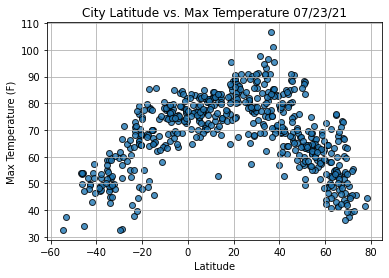

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

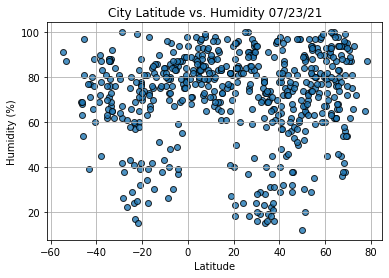

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

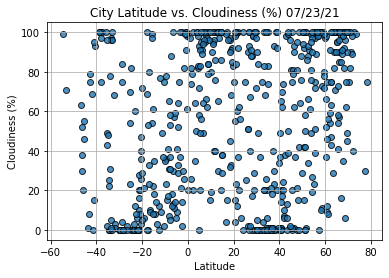

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

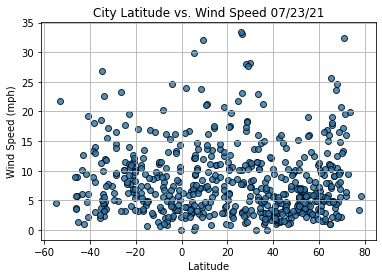

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
from scipy.stats import linregress

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
# Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
#Create the Hemisphere DataFrames
index13 = city_data_df.loc[13]
index13 

City_ID                        13
City                    Kirovskiy
Country                        RU
Date          2021-07-24 00:00:42
Lat                       45.0917
Lng                       133.514
Max Temp                    88.79
Humidity                       56
Cloudiness                     81
Wind Speed                   3.67
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
566     True
567    False
568     True
569     True
570     True
Name: Lat, Length: 571, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Lata,PT,2021-07-24 00:00:35,40.1629,-8.3327,61.05,98,37,2.01
1,1,Los Llanos De Aridane,ES,2021-07-24 00:00:36,28.6585,-17.9182,67.75,91,0,18.41
2,2,West Bay,KY,2021-07-24 00:00:37,19.3667,-81.4167,84.99,81,92,1.01
5,5,Ta Khmau,KH,2021-07-24 00:00:38,11.4833,104.9500,82.45,74,40,6.91
7,7,Barrow,US,2021-07-24 00:00:39,71.2906,-156.7887,39.22,87,90,19.57


In [28]:
#DataFrames for the Northern and Southern Hemispheres' data
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

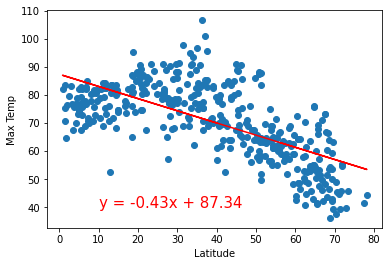

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

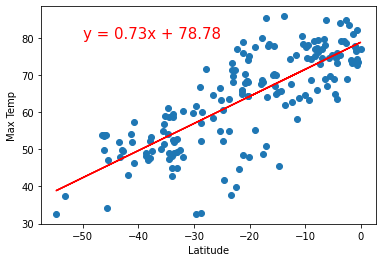

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,80))

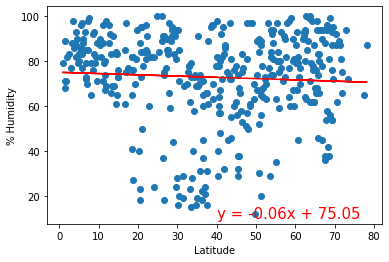

In [31]:
#Latitude vs Humidity.
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity','% Humidity',(40,10))

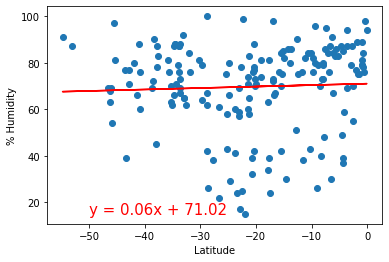

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity','% Humidity', (-50, 15))

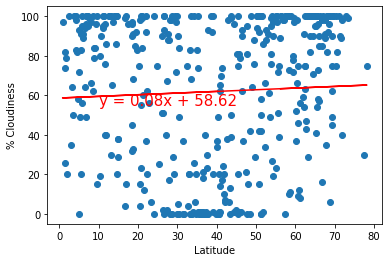

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness','% Cloudiness', (10, 55))

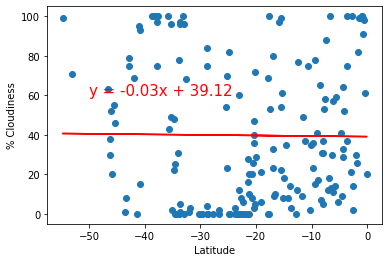

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness','% Cloudiness', (-50,60))

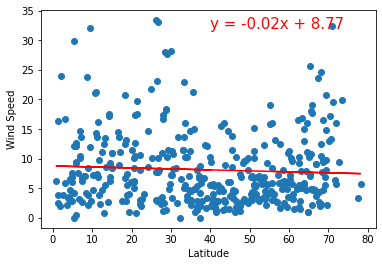

In [35]:
#Latitude and Wind Speed
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,32))

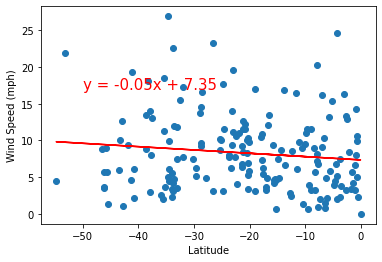

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed (mph)', (-50,17))